# <div style="text-align:center"> $B^{\pm} \xrightarrow{} \pi^+ \pi^- \pi^{\pm}$ </div>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

TChain *B2HHH = new TChain("DecayTree");
B2HHH->Add("data/B2HHH_MagnetUp.root");
B2HHH->Add("data/B2HHH_MagnetDown.root");

B2HHH->Print()

******************************************************************************
*Chain   :DecayTree : data/B2HHH_MagnetUp.root                               *
******************************************************************************
******************************************************************************
*Tree    :DecayTree : Tree continaing data for B- --> h-h+h- decays          *
*Entries :  3420295 : Total =       629522894 bytes  File  Size =  444718406 *
*        :          : Tree compression factor =   1.42                       *
******************************************************************************
*Br    0 :B_FlightDistance : B_FlightDistance/D                              *
*Entries :  3420295 : Total  Size=   27370973 bytes  File Size  =   24630500 *
*Baskets :       72 : Basket Size=    1873408 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :B_VertexChi2 : B_VertexChi2/D             

### Declaring and defining the dataset variables

In [2]:
Double_t B_FlightDistance;          Double_t B_VertexChi2;

Int_t H1_isMuon;         Int_t H2_isMuon;          Int_t H3_isMuon;
Int_t H1_Charge;         Int_t H2_Charge;          Int_t H3_Charge;
Double_t H1_IPChi2;      Double_t H2_IPChi2;       Double_t H3_IPChi2;
Double_t H1_PX;          Double_t H2_PX;           Double_t H3_PX;
Double_t H1_PY;          Double_t H2_PY;           Double_t H3_PY;
Double_t H1_PZ;          Double_t H2_PZ;           Double_t H3_PZ;
Double_t H1_ProbPi;      Double_t H2_ProbPi;       Double_t H3_ProbPi;
Double_t H1_ProbK;       Double_t H2_ProbK;        Double_t H3_ProbK;

B2HHH->SetBranchAddress("B_FlightDistance", &B_FlightDistance);    B2HHH->SetBranchAddress("B_VertexChi2", &B_VertexChi2);

B2HHH->SetBranchAddress("H1_isMuon", &H1_isMuon);     B2HHH->SetBranchAddress("H2_isMuon", &H2_isMuon);     B2HHH->SetBranchAddress("H3_isMuon", &H3_isMuon);
B2HHH->SetBranchAddress("H1_Charge", &H1_Charge);     B2HHH->SetBranchAddress("H2_Charge", &H2_Charge);     B2HHH->SetBranchAddress("H3_Charge", &H3_Charge);
B2HHH->SetBranchAddress("H1_IPChi2", &H1_IPChi2);     B2HHH->SetBranchAddress("H2_IPChi2", &H2_IPChi2);     B2HHH->SetBranchAddress("H3_IPChi2", &H3_IPChi2);
B2HHH->SetBranchAddress("H1_PX", &H1_PX);             B2HHH->SetBranchAddress("H2_PX", &H2_PX);             B2HHH->SetBranchAddress("H3_PX", &H3_PX);
B2HHH->SetBranchAddress("H1_PY", &H1_PY);             B2HHH->SetBranchAddress("H2_PY", &H2_PY);             B2HHH->SetBranchAddress("H3_PY", &H3_PY);
B2HHH->SetBranchAddress("H1_PZ", &H1_PZ);             B2HHH->SetBranchAddress("H2_PZ", &H2_PZ);             B2HHH->SetBranchAddress("H3_PZ", &H3_PZ);
B2HHH->SetBranchAddress("H1_ProbPi", &H1_ProbPi);     B2HHH->SetBranchAddress("H2_ProbPi", &H2_ProbPi);     B2HHH->SetBranchAddress("H3_ProbPi", &H3_ProbPi);
B2HHH->SetBranchAddress("H1_ProbK", &H1_ProbK);       B2HHH->SetBranchAddress("H2_ProbK", &H2_ProbK);       B2HHH->SetBranchAddress("H3_ProbK", &H3_ProbK);

//---------OTHER DEFINITIONS

B_m = 5279.38; // B meson mass in MeV
double Pi_m = 139.57039; // MeV
double K_m  = 493.677;   // MeV
double D0m = 1864.84;    // MeV

float prob_pi = 0.5;
float prob_ka = 0.5;

int nentries, nbytes, i;
nentries = (Int_t)B2HHH->GetEntries();

## ParticleID selection and Pions momenta

In [3]:
int bin = 30;
int suplim = 140000;

TH1F *momentumPion1 = new TH1F("momentumPion1","momentumPion1; p(MeV); Events",bin,0,suplim);
TH1F *momentumPion2 = new TH1F("momentumPion2","momentumPion2; p(MeV); Events",bin,0,suplim);
TH1F *momentumPion3 = new TH1F("momentumPion3","momentumPion3; p(MeV); Events",bin,0,suplim);
TH1F *h_Bmass = new TH1F("h_Bmass","Bmass; m(MeV); Events",60,3000,7000);

for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi < prob_pi || H2_ProbPi < prob_pi || H3_ProbPi < prob_pi) continue;
    if(H1_ProbK  > prob_ka || H2_ProbK  > prob_ka || H3_ProbK  > prob_ka) continue;    
    TLorentzVector Pion1  = TLorentzVector(); 
    TLorentzVector Pion2  = TLorentzVector();
    TLorentzVector Pion3  = TLorentzVector();
       
    Pion1.SetXYZM(H1_PX, H1_PY, H1_PZ,Pi_m);        momentumPion1->Fill(Pion1.P(),1);
    Pion2.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);        momentumPion2->Fill(Pion2.P(),1);
    Pion3.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);        momentumPion3->Fill(Pion3.P(),1);   
    double Bmass = (Pion1 + Pion2 + Pion3).M();     h_Bmass->Fill(Bmass,1);
}

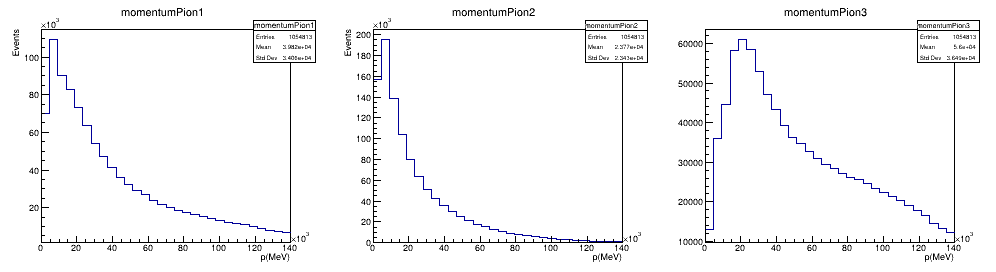

In [4]:
auto c1 = new TCanvas("c1","c1",1000,300);    c1->Divide(3,1);
c1->cd(1); momentumPion1->Draw();
c1->cd(2); momentumPion2->Draw();
c1->cd(3); momentumPion3->Draw();
c1->Draw()

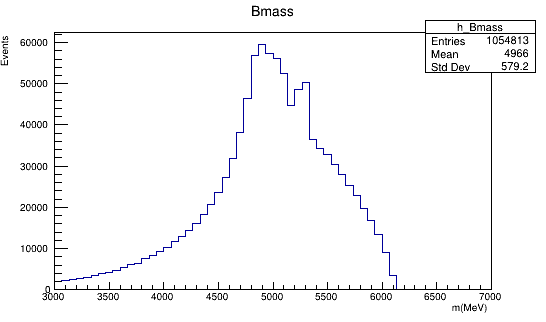

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",550,350);
h_Bmass->Draw();
canvas->Draw()

## randomizing H2 and H3 momenta (as scalars)

In [6]:
TH1F *momentumPion1 = new TH1F("momentumPion1","momentumPion1; p(MeV); Events",bin,0,suplim);
TH1F *momentumPion2 = new TH1F("momentumPion2","momentumPion2; p(MeV); Events",bin,0,suplim);
TH1F *momentumPion3 = new TH1F("momentumPion3","momentumPion3; p(MeV); Events",bin,0,suplim);
TH1F *h_Bmass = new TH1F("h_Bmass","Bmass; m(MeV); Events",60,3000,7000);

float prob_pi = 0.5;
float prob_ka = 0.5;

for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi < prob_pi || H2_ProbPi < prob_pi || H3_ProbPi < prob_pi) continue;
    if(H1_ProbK  > prob_ka || H2_ProbK  > prob_ka || H3_ProbK  > prob_ka) continue;    
    TLorentzVector Pion1  = TLorentzVector();   Pion1.SetXYZM(H1_PX, H1_PY, H1_PZ,Pi_m);  
    TLorentzVector Pion2  = TLorentzVector();   Pion2.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);  
    TLorentzVector Pion3  = TLorentzVector();   Pion3.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);   
  
    TRandom2 *rand = new TRandom2(i);     int r = rand->Binomial(1,0.5);    
    double P_array[2]; 
    P_array[0] = Pion2.P();               P_array[1] = Pion3.P();
    
    momentumPion1->Fill(Pion1.P(),1);
    momentumPion2->Fill(P_array[r],1);
    momentumPion3->Fill(P_array[1-r],1); 
}

Warning in <TROOT::Append>: Replacing existing TH1: momentumPion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: momentumPion2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: momentumPion3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bmass (Potential memory leak).


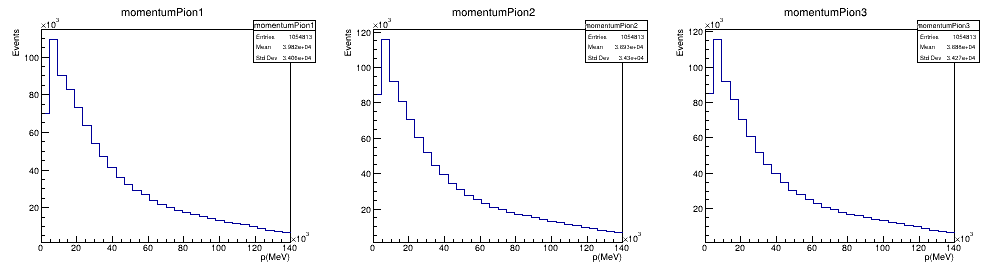

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [7]:
auto c1 = new TCanvas("c1","c1",1000,300);    c1->Divide(3,1);
c1->cd(1); momentumPion1->Draw();
c1->cd(2); momentumPion2->Draw();
c1->cd(3); momentumPion3->Draw();
c1->Draw()

------------------

# 2-body objects

Where the Pion 2 and 3, coming from the "H2" and "H3" dataset variables, must be used randomly at the time of calculating the M12 and M13 invariant masses

In [8]:
TH1F *h_M12_plus = new TH1F("h_M12_plus","M12 ; m(MeV); Events",80,0,7000);
TH1F *h_M13_plus = new TH1F("h_M13_plus","M13 B+; m(MeV); Events",80,0,7000);
TH1F *h_M12_minus = new TH1F("h_M12_minus","M12 B-; m(MeV); Events",80,0,7000);
TH1F *h_M13_minus = new TH1F("h_M13_minus","M13 B-; m(MeV); Events",80,0,7000);

for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi < prob_pi || H2_ProbPi < prob_pi || H3_ProbPi < prob_pi) continue;
    if(H1_ProbK  > prob_ka || H2_ProbK  > prob_ka || H3_ProbK  > prob_ka) continue;
    
    // DEFINING AND FEEDING TLORENTZ VECTORS
    TLorentzVector Pion1  = TLorentzVector();   Pion1.SetXYZM(H1_PX, H1_PY, H1_PZ,Pi_m);  
    TLorentzVector Pion2  = TLorentzVector();   Pion2.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);  
    TLorentzVector Pion3  = TLorentzVector();   Pion3.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);   
    
    // WORKING OUT THE RANDOMIZATION
    TRandom2 *rand = new TRandom2(i);          int r = rand->Binomial(1,0.5);
    TLorentzVector *vec_array = new TLorentzVector[2];
    vec_array[0] = Pion2;      vec_array[1] = Pion3;
    
    // 2-BODY INVARIANT MASSES (NOTE RANDOMNESS)
    double M12 = (Pion1 + vec_array[r]).M();     double M13 = (Pion1 + vec_array[1-r]).M();   
    
    // FILLING B+ OR B- HISTOGRAMS ACCORDINGLY
    if(H1_Charge == -1) { h_M12_plus->Fill(M12,1);  h_M13_plus->Fill(M13,1); }
    if(H1_Charge == 1) { h_M12_minus->Fill(M12,1);  h_M13_minus->Fill(M13,1); }
}

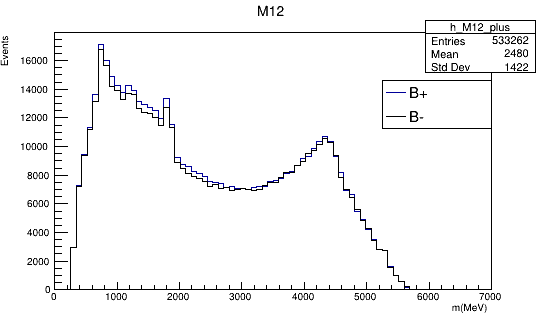

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [9]:
TCanvas *canvas = new TCanvas("Canvas","",550,350);
h_M12_plus->Draw();
h_M12_minus->Draw("samehist");
h_M12_minus->SetLineColor(1);

TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_M12_plus, "B+", "l"); leg->AddEntry(h_M12_minus, "B-", "l"); leg->Draw();
canvas->Draw()

## Taking out the $D_0$ mass

In [10]:
double prob_pi = 0.8;  double prob_ka = 0.2;

TH1F *h_M12_plus = new TH1F("h_M12_plus","m_{12}; m(MeV); Events",80,0,7000);
TH1F *h_M13_plus = new TH1F("h_M13_plus","m_{13}; m(MeV); Events",80,0,7000);
TH1F *h_M12_minus = new TH1F("h_M12_minus","h_M12_minus; m(MeV); Events",80,0,7000);
TH1F *h_M13_minus = new TH1F("h_M13_minus","h_M13_minus; m(MeV); Events",80,0,7000);

TH1F *h_M12_plus_SQ = new TH1F("h_M12_plus_SQ","m_{12}^{2}; m(GeV); Events",80,0,35);
TH1F *h_M13_plus_SQ = new TH1F("h_M13_plus_SQ","m_{13}^{2}; m(GeV); Events",80,0,35);
TH1F *h_M12_minus_SQ = new TH1F("h_M12_minus_SQ","h_M12_minus; m(GeV); Events",80,0,35);
TH1F *h_M13_minus_SQ = new TH1F("h_M13_minus_SQ","h_M13_minus; m(GeV); Events",80,0,35);

for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi < prob_pi || H2_ProbPi < prob_pi || H3_ProbPi < prob_pi) continue;
    if(H1_ProbK  > prob_ka || H2_ProbK  > prob_ka || H3_ProbK  > prob_ka) continue;
    
    // DEFINING AND FEEDING TLORENTZ VECTORS
    TLorentzVector Pion1  = TLorentzVector();   Pion1.SetXYZM(H1_PX, H1_PY, H1_PZ,Pi_m);  
    TLorentzVector Pion2  = TLorentzVector();   Pion2.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);  
    TLorentzVector Pion3  = TLorentzVector();   Pion3.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);   
    
    // WORKING OUT THE RANDOMIZATION
    TRandom2 *rand = new TRandom2(i);          int r = rand->Binomial(1,0.5);
    TLorentzVector *vec_array = new TLorentzVector[2];
    vec_array[0] = Pion2;      vec_array[1] = Pion3;
    
    // 2-BODY INVARIANT MASSES (NOTE RANDOMNESS)
    double M12 = (Pion1 + vec_array[r]).M();     double M13 = (Pion1 + vec_array[1-r]).M();   
    
    // FILLING B+ AND B- HISTOGRAMS ACCORDINGLY, ALONG WITH THE D_0 MASS EXCLUSION
    if(H1_Charge == -1) { 
        if(M12 < D0m - 30. || M12 > D0m + 30.) { h_M12_plus->Fill(M12,1); 
                                                 h_M12_plus_SQ->Fill(M12*M12/1e6,1);}
        if(M13 < D0m - 30. || M13 > D0m + 30.) { h_M13_plus->Fill(M13,1); 
                                                 h_M13_plus_SQ->Fill(M13*M13/1e6,1);}        
        }
    if(H1_Charge == 1) { 
        if(M12 < D0m - 30. || M12 > D0m + 30.) { h_M12_minus->Fill(M12,1); 
                                                 h_M12_minus_SQ->Fill(M12*M12/1e6,1);}
        if(M13 < D0m - 30. || M13 > D0m + 30.) { h_M13_minus->Fill(M13,1); 
                                                 h_M13_minus_SQ->Fill(M13*M13/1e6,1);}        
        }
}

Warning in <TROOT::Append>: Replacing existing TH1: h_M12_plus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_M13_plus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_M12_minus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_M13_minus (Potential memory leak).


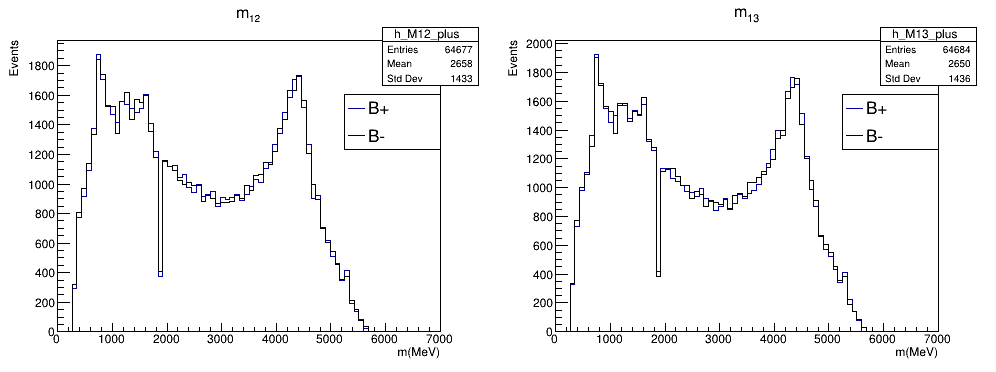

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
auto c1 = new TCanvas("c1","c1",1000,400);  c1->Divide(2,1);

c1->cd(1);
h_M12_plus->Draw();
h_M12_minus->Draw("samehist");
h_M12_minus->SetLineColor(1);
TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_M12_plus, "B+", "l"); leg->AddEntry(h_M12_minus, "B-", "l"); leg->Draw();

c1->cd(2);
h_M13_plus->Draw();
h_M13_minus->Draw("samehist");
h_M13_minus->SetLineColor(1);
TLegend *leg2 = new TLegend(0.7,0.6,0.9,0.75);
leg2->AddEntry(h_M13_plus, "B+", "l"); leg2->AddEntry(h_M13_minus, "B-", "l"); leg2->Draw();

c1->Draw();

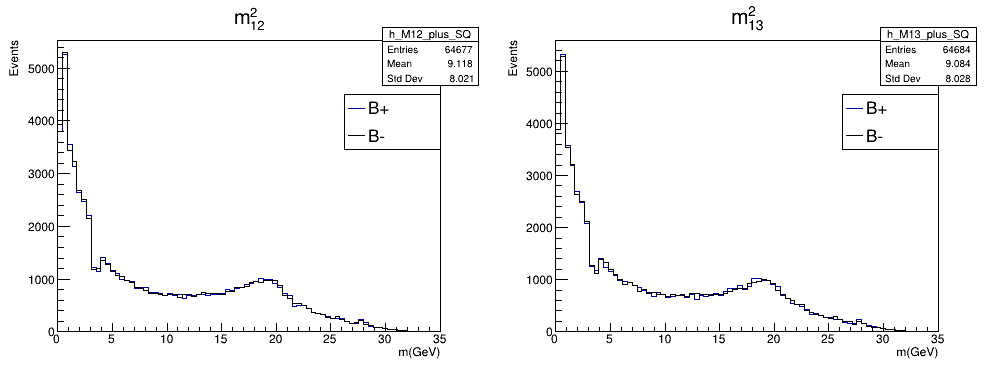

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
auto c1 = new TCanvas("c1","c1",1000,400);  c1->Divide(2,1);

c1->cd(1);
// gPad-> SetLogy();
h_M12_plus_SQ->Draw();
h_M12_minus_SQ->Draw("samehist");
h_M12_minus_SQ->SetLineColor(1);
TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_M12_plus_SQ, "B+", "l"); leg->AddEntry(h_M12_minus_SQ, "B-", "l"); leg->Draw();

c1->cd(2);
h_M13_plus_SQ->Draw();
h_M13_minus_SQ->Draw("samehist");
h_M13_minus_SQ->SetLineColor(1);
TLegend *leg2 = new TLegend(0.7,0.6,0.9,0.75);
leg2->AddEntry(h_M13_plus_SQ, "B+", "l"); leg2->AddEntry(h_M13_minus_SQ, "B-", "l"); leg2->Draw();

c1->Draw()

------------------

# Dalitz plots

In [13]:
double min_prob_pi = 0.8;  double max_prob_ka = 0.2; double B_thresh = 50;

// Dalitz plot bins
int dpxbins = 10;  int dpybins = 14;

TH1F *h_Mlowplus = new TH1F("h_Mlowplus","m_{low}^{2}; m(GeV); Events",80,0,15);
TH1F *h_Mlowminus = new TH1F("h_Mlowminus","m_{low}^{2}; m(GeV); Events",80,0,15);
TH1F *h_Mlowplus_focused = new TH1F("h_Mlowplus_focused","m_{low}^{2}; m(GeV); Events",25,0,2.5);
TH1F *h_Mlowminus_focused = new TH1F("h_Mlowminus_focused","m_{low}^{2}; m(GeV); Events",25,0,2.5);
TH1F *h_Mhighplus = new TH1F("h_Mhighplus","m_{high}^{2}; m(GeV); Events",80,0,30);
TH1F *h_Mhighminus = new TH1F("h_Mhighminus","m_{high}^{2}; m(GeV); Events",80,0,30);
TH2F *h_Bplus = new TH2F("h_Bplus","B^{+}; m12^{2}; m13^{2}",20,0,35, 20, 0, 35);
TH2F *h_Bminus = new TH2F("h_Bminus","B^{-}; m12^{2}; m13^{2}",20,0,35, 20, 0, 35);
TH2F *h_Bplus_sym = new TH2F("h_Bplus_sym","B^{+} sym; Mlow^{2}; Mhigh^{2}",dpxbins,0,25, dpybins, 0, 35);
TH2F *h_Bminus_sym = new TH2F("h_Bminus_sym","B^{-} sym; Mlow^{2}; Mhigh^{2}",dpxbins,0,25, dpybins, 0, 35); 

for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi < min_prob_pi || H2_ProbPi < min_prob_pi || H3_ProbPi < min_prob_pi) continue;
    if(H1_ProbK  > max_prob_ka || H2_ProbK  > max_prob_ka || H3_ProbK  > max_prob_ka) continue;
    
    // DEFINING AND FEEDING TLORENTZ VECTORS
    TLorentzVector Pion1  = TLorentzVector();   Pion1.SetXYZM(H1_PX, H1_PY, H1_PZ,Pi_m);  
    TLorentzVector Pion2  = TLorentzVector();   Pion2.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);  
    TLorentzVector Pion3  = TLorentzVector();   Pion3.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);   
    
    // WORKING OUT THE RANDOMIZATION
    TRandom2 *rand = new TRandom2(i);          int r = rand->Binomial(1,0.5);
    TLorentzVector *vec_array = new TLorentzVector[2];
    vec_array[0] = Pion2;      vec_array[1] = Pion3;
    
    // 2-BODY INVARIANT MASSES (NOTE RANDOMNESS)
    double M12 = (Pion1 + vec_array[r]).M();     double M13 = (Pion1 + vec_array[1-r]).M();
    
    double PT = (Pion1 + Pion2 + Pion3).Pt();
    double Bmass = (Pion1 + Pion2 + Pion3).M();
    
    if(Bmass < B_m + B_thresh && Bmass > B_m - B_thresh && PT > 1700) { // B Pt and Mass cuts
    
        if( (M12 < D0m - 30. || M12 > D0m + 30.) && (M13 < D0m - 30. || M13 > D0m + 30.) ){ // D0 exclusion

            if(H1_Charge == -1) { 
                h_Bplus->Fill(M12*M12/1e6,M13*M13/1e6);
                // Mlow and Mhigh separation
                if(M12 > M13){ 
                    h_Mlowplus->Fill(M13*M13/1e6);   h_Mhighplus->Fill(M12*M12/1e6);
                    h_Bplus_sym->Fill(M13*M13/1e6,M12*M12/1e6); 
                    if(M12*M12 > 15e6) {h_Mlowplus_focused->Fill(M13*M13/1e6);}
                }
                else{
                    h_Mlowplus->Fill(M12*M12/1e6);   h_Mhighplus->Fill(M13*M13/1e6);
                    h_Bplus_sym->Fill(M12*M12/1e6,M13*M13/1e6); 
                    if(M13*M13 > 15e6) {h_Mlowplus_focused->Fill(M12*M12/1e6);}
                }
            }

            if(H1_Charge == 1) { 
                h_Bminus->Fill(M12*M12/1e6,M13*M13/1e6);
                // Mlow and Mhigh separation
                if(M12 > M13){
                    h_Mlowminus->Fill(M13*M13/1e6);   h_Mhighminus->Fill(M12*M12/1e6);
                    h_Bminus_sym->Fill(M13*M13/1e6,M12*M12/1e6); 
                    if(M12*M12 > 15e6) {h_Mlowminus_focused->Fill(M13*M13/1e6);}
                }
                else{
                    h_Mlowminus->Fill(M12*M12/1e6);   h_Mhighminus->Fill(M13*M13/1e6);
                    h_Bminus_sym->Fill(M12*M12/1e6,M13*M13/1e6); 
                    if(M13*M13 > 15e6) {h_Mlowminus_focused->Fill(M12*M12/1e6);}
                }
            }
        }
    }
}

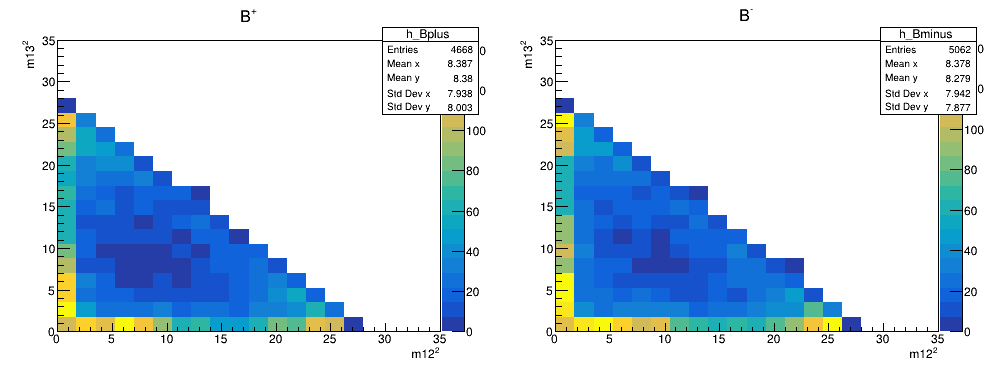

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [14]:
auto c1 = new TCanvas("c1","c1",1000,400);
c1->Divide(2,1);

// h_Bplus->SetStats(1);
// h_Bplus->SetStats(1);

c1->cd(1); h_Bplus->Draw("COLZ");
c1->cd(2); h_Bminus->Draw("COLZ");
c1->Draw()

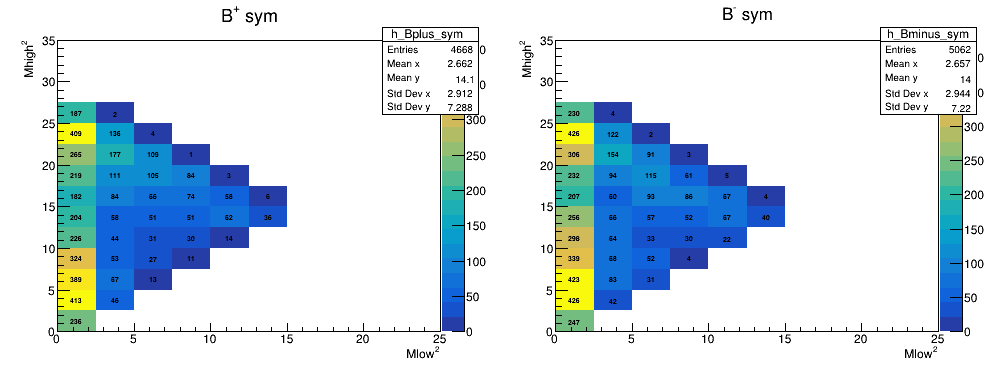

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [15]:
auto c1 = new TCanvas("c1","c1",1000,400);    c1->Divide(2,1);

c1->cd(1); h_Bplus_sym->Draw("text COLZ");
c1->cd(2); h_Bminus_sym->Draw("text COLZ");
c1->Draw()

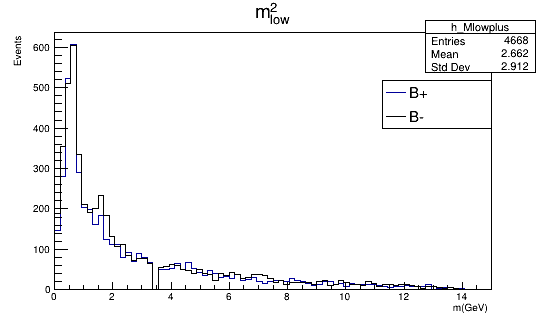

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [16]:
TCanvas *canvas = new TCanvas("Canvas","",550,350);
h_Mlowplus->Draw();
h_Mlowminus->Draw("samehist");
h_Mlowminus->SetLineColor(1);

TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_Mlowplus, "B+", "l"); leg->AddEntry(h_Mlowminus, "B-", "l"); leg->Draw();
canvas->Draw()

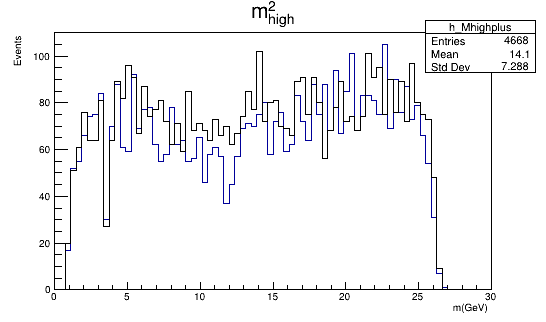

In [17]:
h_Mhighplus->Draw();
h_Mhighminus->Draw("samehist");
h_Mhighminus->SetLineColor(1);

// TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
// leg->AddEntry(h_Mhighplus, "B+", "l"); leg->AddEntry(h_Mhighminus, "B-", "l"); leg->Draw();
canvas->Draw()

the $Mlow^2$ variable for $Mhigh^2$ > 15 $GeV^2/c^4$ [ref](https://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-051.html)

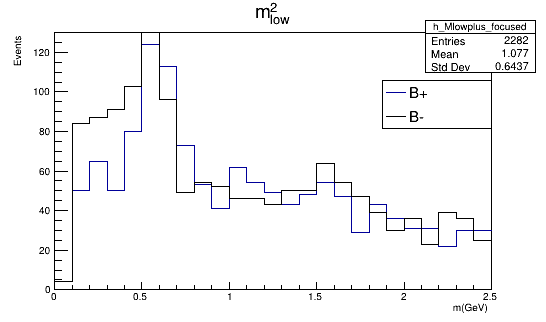

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [18]:
TCanvas *canvas = new TCanvas("Canvas","",550,350);

h_Mlowplus_focused->Draw();
h_Mlowminus_focused->Draw("samehist");
h_Mlowminus_focused->SetLineColor(1);

TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_Mlowplus_focused, "B+", "l"); leg->AddEntry(h_Mlowminus_focused, "B-", "l"); leg->Draw();
canvas->Draw()

-----------------

# Asymmetry

# <div style="text-align:center"> $A = \frac{N^- - N^+}{N^- + N^+}$ </div>

# Statistical uncertainty

# <div style="text-align:center"> $\sigma_A = \sqrt{ \frac{1 - A^2}{N^- + N^+} }  $ </div>

The significance of the result, sigma, is found by dividing the value for asymmetry by its uncertainty. A value exceeding three sigma is considered "evidence" by particle physicists while a value of five sigma or more can be called an "observation" or "discovery"

#### Operating histograms

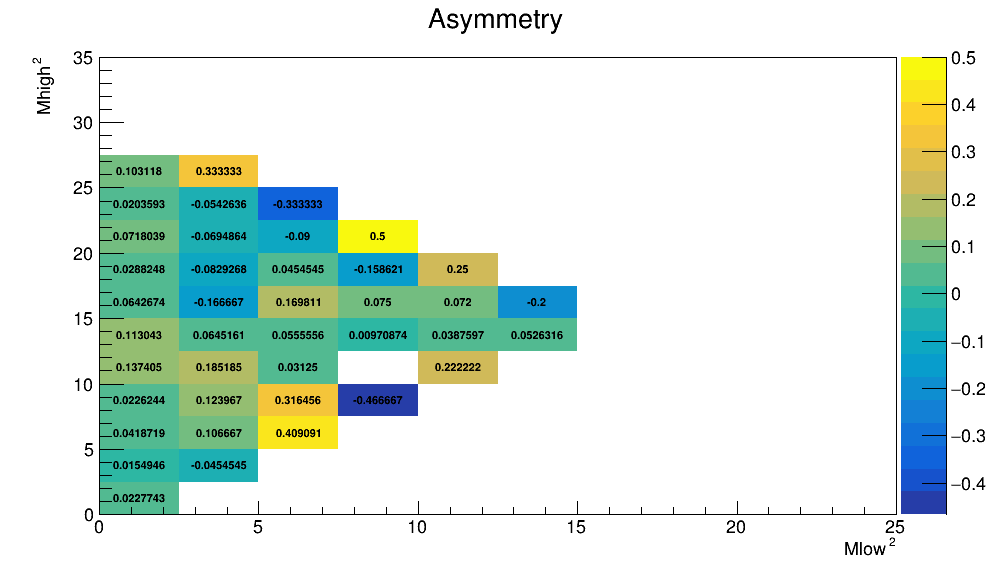

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [19]:
TH2F *Numerator = (TH2F*) h_Bminus_sym->Clone();
TH2F *Denominator = (TH2F*) h_Bminus_sym->Clone();
Numerator->Add(h_Bplus_sym, -1);
Denominator->Add(h_Bplus_sym, 1);

Numerator->Divide(Denominator);

TH2F *Asym = Numerator;
Asym->SetTitle("Asymmetry");
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Asym->SetStats(0);
Asym->Draw("text colz1");
canvas->Draw();

#### Re-setting bin content

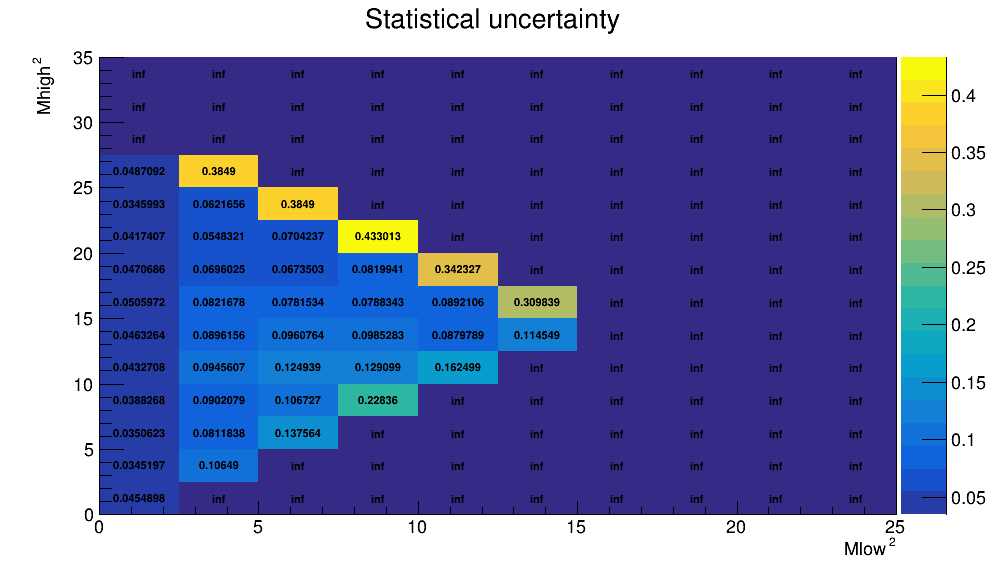

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [20]:
TH2F *Uncertainty = (TH2F*) Asym->Clone();
Uncertainty->SetTitle("Statistical uncertainty");

for (int bin=0; bin<=Asym->GetNcells(); ++bin) {
    double binAsym = Uncertainty->GetBinContent(bin);
    double binDenom = Denominator->GetBinContent(bin);
    Uncertainty->SetBinContent(bin, sqrt( (1 - binAsym*binAsym) / binDenom ));
}
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Uncertainty->SetStats(0);
Uncertainty->Draw("text colz");
canvas->Draw();

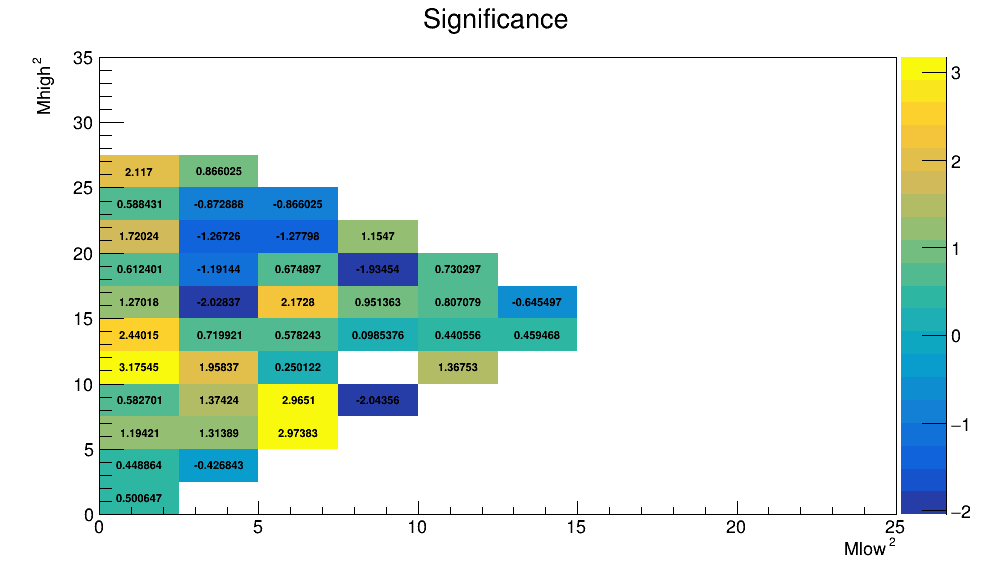

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [21]:
TH2F *Significance = (TH2F*) Asym->Clone();
Significance->SetTitle("Significance");

Significance->Divide(Uncertainty);
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
// Significance->SetStats(0);
Significance->Draw("text colz1");
canvas->Draw();

some manual verifications

In [22]:
double AA = 0.00487165;
int deno = 39810 + 39424;

unc = sqrt((1- AA*AA)/deno);

Asym->GetBinContent(20);
Asym->GetNcells();
unc

(double) 0.0035525406
